### BACKEND APLICATIVO MÓVIL PARA EVALUAR EL RIESGO DE GLAUCOMA - (EYE ALERT)

#### LIMPIEZA DEL DATASET ORIGEN

In [3]:
import pandas as pd
import numpy as np

In [4]:
carpeta_dataset = r'D:/EyeAlertModeloAPI/'
archivo = 'glaucoma_dataset.csv'
dataset_glaucoma = pd.read_csv(carpeta_dataset+archivo,sep=',')
dataset_glaucoma.head(10)


,Patient ID,Age,Gender,Visual Acuity Measurements,Intraocular Pressure (IOP),Cup-to-Disc Ratio (CDR),Family History,Medical History,Medication Usage,Visual Field Test Results,Optical Coherence Tomography (OCT) Results,Pachymetry,Cataract Status,Angle Closure Status,Visual Symptoms,Diagnosis,Glaucoma Type
0,62431,69,Male,LogMAR 0.1,19.46,0.42,No,Diabetes,"Amoxicillin, Lisinopril, Omeprazole, Atorvasta...","Sensitivity: 0.54, Specificity: 0.75","RNFL Thickness: 86.48 µm, GCC Thickness: 64.14...",541.51,Present,Open,"Tunnel vision, Eye pain, Nausea",No Glaucoma,Primary Open-Angle Glaucoma
1,68125,69,Female,LogMAR 0.1,18.39,0.72,No,Hypertension,"Lisinopril, Amoxicillin, Atorvastatin, Ibuprof...","Sensitivity: 0.72, Specificity: 0.88","RNFL Thickness: 96.88 µm, GCC Thickness: 56.48...",552.77,Absent,Open,"Redness in the eye, Vision loss, Tunnel vision",No Glaucoma,Juvenile Glaucoma
2,63329,67,Female,20/40,23.65,0.72,No,Hypertension,"Amoxicillin, Ibuprofen, Metformin, Atorvastati...","Sensitivity: 0.56, Specificity: 0.8","RNFL Thickness: 89.81 µm, GCC Thickness: 59.05...",573.65,Absent,Closed,"Halos around lights, Vision loss, Redness in t...",No Glaucoma,Juvenile Glaucoma
3,47174,23,Male,LogMAR 0.0,18.04,0.61,No,NaN,"Ibuprofen, Aspirin","Sensitivity: 0.6, Specificity: 0.93","RNFL Thickness: 87.25 µm, GCC Thickness: 63.98...",590.67,Absent,Closed,"Nausea, Nausea, Halos around lights",No Glaucoma,Congenital Glaucoma
4,67361,21,Male,LogMAR 0.1,15.87,0.30,No,Diabetes,"Amoxicillin, Omeprazole, Aspirin, Ibuprofen, A...","Sensitivity: 0.82, Specificity: 0.9","RNFL Thickness: 82.61 µm, GCC Thickness: 66.01...",588.41,Absent,Closed,"Eye pain, Eye pain, Tunnel vision",No Glaucoma,Primary Open-Angle Glaucoma
5,12544,88,Female,20/40,24.66,0.58,No,NaN,"Ibuprofen, Omeprazole, Atorvastatin, Aspirin, ...","Sensitivity: 0.87, Specificity: 0.72","RNFL Thickness: 98.01 µm, GCC Thickness: 56.11...",562.15,Absent,Closed,"Eye pain, Eye pain, Eye pain",No Glaucoma,Juvenile Glaucoma
6,57342,46,Male,20/40,16.43,0.39,Yes,Diabetes,"Omeprazole, Ibuprofen, Amoxicillin, Atorvastat...","Sensitivity: 0.7, Specificity: 0.96","RNFL Thickness: 77.92 µm, GCC Thickness: 62.46...",523.05,Present,Open,"Nausea, Nausea, Vomiting",Glaucoma,Juvenile Glaucoma
7,71427,66,Female,LogMAR 0.1,22.33,0.46,No,Hypertension,"Ibuprofen, Aspirin","Sensitivity: 0.98, Specificity: 0.83","RNFL Thickness: 95.72 µm, GCC Thickness: 58.81...",552.21,Absent,Open,"Eye pain, Nausea, Halos around lights",No Glaucoma,Primary Open-Angle Glaucoma
8,98588,60,Male,LogMAR 0.0,12.67,0.52,Yes,Diabetes,"Ibuprofen, Atorvastatin, Metformin","Sensitivity: 0.97, Specificity: 0.73","RNFL Thickness: 83.78 µm, GCC Thickness: 56.93...",520.38,Absent,Open,"Blurred vision, Vision loss, Nausea",Glaucoma,Primary Open-Angle Glaucoma
9,4814,29,Male,20/20,11.40,0.37,No,NaN,NaN,"Sensitivity: 0.94, Specificity: 0.78","RNFL Thickness: 80.37 µm, GCC Thickness: 67.89...",574.23,Present,Closed,"Redness in the eye, Vomiting, Vision loss",No Glaucoma,Congenital Glaucoma


In [5]:
# FACTORES DE RIESGO VALIDADOS POR ESPECIALISTA (OFTALMÓLOGO)
df_glaucoma = dataset_glaucoma[["Age","Gender","Intraocular Pressure (IOP)","Family History","Medical History","Cataract Status","Diagnosis"]]
df_glaucoma.head(1)

,Age,Gender,Intraocular Pressure (IOP),Family History,Medical History,Cataract Status,Diagnosis
0,69,Male,19.46,No,Diabetes,Present,No Glaucoma


In [6]:
# Tipos de datos
df_glaucoma.dtypes

Age                             int64
Gender                         object
Intraocular Pressure (IOP)    float64
Family History                 object
Medical History                object
Cataract Status                object
Diagnosis                      object
dtype: object

In [7]:
# Estadistica descriptiva
df_glaucoma.describe()

,Age,Intraocular Pressure (IOP)
count,10000.000000,10000.000000
mean,53.872200,17.507527
std,21.127563,4.356101
min,18.000000,10.000000
25%,36.000000,13.760000
50%,54.000000,17.485000
75%,72.000000,21.300000
max,90.000000,25.000000


In [8]:
# Filtro de personas mayores a 40 años
df_glaucoma = df_glaucoma[df_glaucoma["Age"]>=40] 
df_glaucoma.shape # Nueva cantidad filtrada por la edad: 6969


(6969, 7)

In [9]:
# Estandarizamos el género: Male (1) - Female (0)

df_glaucoma["Sex"] = np.where(df_glaucoma["Gender"]=="Male",1,0) # Creamos nueva columna a partir de condiciones
df_glaucoma.drop("Gender",axis=1,inplace=True) # Borramosantigua columna
df_glaucoma.head(1)
# df_glaucoma.shape


,Age,Intraocular Pressure (IOP),Family History,Medical History,Cataract Status,Diagnosis,Sex
0,69,19.46,No,Diabetes,Present,No Glaucoma,1


In [10]:
# Conversión de valores IOP a binario:
# IOP>= 19 : 1
# IOP<19   : 0 
df_glaucoma["IOP"] = np.where(df_glaucoma["Intraocular Pressure (IOP)"]>=19,1,0)
df_glaucoma.drop("Intraocular Pressure (IOP)",axis=1,inplace=True) # Borrar columna: Intraocular Pressure
df_glaucoma.head()

,Age,Family History,Medical History,Cataract Status,Diagnosis,Sex,IOP
0,69,No,Diabetes,Present,No Glaucoma,1,1
1,69,No,Hypertension,Absent,No Glaucoma,0,0
2,67,No,Hypertension,Absent,No Glaucoma,0,1
5,88,No,NaN,Absent,No Glaucoma,0,1
6,46,Yes,Diabetes,Present,Glaucoma,1,0


In [11]:
# # Conversión del valor de Histoial Familiar a binario:
df_glaucoma["FamilyHistory"] = np.where(df_glaucoma["Family History"]=="Yes",1,0)
df_glaucoma.drop(columns="Family History",axis=1,inplace=True)
df_glaucoma.head()


,Age,Medical History,Cataract Status,Diagnosis,Sex,IOP,FamilyHistory
0,69,Diabetes,Present,No Glaucoma,1,1,0
1,69,Hypertension,Absent,No Glaucoma,0,0,0
2,67,Hypertension,Absent,No Glaucoma,0,1,0
5,88,NaN,Absent,No Glaucoma,0,1,0
6,46,Diabetes,Present,Glaucoma,1,0,1


In [12]:

# Reemplazamos valores Nulos o NaN por "Sin enfermdad"
df_glaucoma["Medical History"].isnull().sum() # Valores nulos = 1777
# df_glaucoma["Medical History"].fillna("Sin enfermedad")
# df_glaucoma.shape # 6969 datos

np.int64(1777)

In [13]:
df_glaucoma.head()

,Age,Medical History,Cataract Status,Diagnosis,Sex,IOP,FamilyHistory
0,69,Diabetes,Present,No Glaucoma,1,1,0
1,69,Hypertension,Absent,No Glaucoma,0,0,0
2,67,Hypertension,Absent,No Glaucoma,0,1,0
5,88,NaN,Absent,No Glaucoma,0,1,0
6,46,Diabetes,Present,Glaucoma,1,0,1


In [14]:
df_dummies = pd.get_dummies(df_glaucoma["Medical History"])
df_glaucoma = df_glaucoma.join(df_dummies)
df_glaucoma.drop("Medical History",axis=1,inplace=True)
df_glaucoma.head()


,Age,Cataract Status,Diagnosis,Sex,IOP,FamilyHistory,Diabetes,Glaucoma in family,Hypertension
0,69,Present,No Glaucoma,1,1,0,True,False,False
1,69,Absent,No Glaucoma,0,0,0,False,False,True
2,67,Absent,No Glaucoma,0,1,0,False,False,True
5,88,Absent,No Glaucoma,0,1,0,False,False,False
6,46,Present,Glaucoma,1,0,1,True,False,False


In [15]:
df_glaucoma.head()

,Age,Cataract Status,Diagnosis,Sex,IOP,FamilyHistory,Diabetes,Glaucoma in family,Hypertension
0,69,Present,No Glaucoma,1,1,0,True,False,False
1,69,Absent,No Glaucoma,0,0,0,False,False,True
2,67,Absent,No Glaucoma,0,1,0,False,False,True
5,88,Absent,No Glaucoma,0,1,0,False,False,False
6,46,Present,Glaucoma,1,0,1,True,False,False


In [16]:
df_glaucoma["Hypertension"] = df_glaucoma["Hypertension"].replace({True:1,False:0})
df_glaucoma["Diabetes"] = df_glaucoma["Diabetes"].replace({True:1,False:0})
# df_glaucoma["Glaucoma in family"] = df_glaucoma["Glaucoma in family"].replace({True:1,False:0})
df_glaucoma.head()

C:\Users\MrDev\AppData\Local\Temp\ipykernel_18016\3317937522.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_glaucoma["Hypertension"] = df_glaucoma["Hypertension"].replace({True:1,False:0})
C:\Users\MrDev\AppData\Local\Temp\ipykernel_18016\3317937522.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_glaucoma["Diabetes"] = df_glaucoma["Diabetes"].replace({True:1,False:0})


,Age,Cataract Status,Diagnosis,Sex,IOP,FamilyHistory,Diabetes,Glaucoma in family,Hypertension
0,69,Present,No Glaucoma,1,1,0,1,False,0
1,69,Absent,No Glaucoma,0,0,0,0,False,1
2,67,Absent,No Glaucoma,0,1,0,0,False,1
5,88,Absent,No Glaucoma,0,1,0,0,False,0
6,46,Present,Glaucoma,1,0,1,1,False,0


In [17]:
df_glaucoma.drop(columns="Glaucoma in family",axis=1,inplace=True)

In [231]:
# df_glaucoma["Glaucoma in family"].value_counts()

Glaucoma in family
0    5249
1    1720
Name: count, dtype: int64

In [ ]:
# # Normalizamos valores de la columna Medical History
# # Sin enfermedad:0 - Hypertension: 1 - Diabetes: 2

# # Paso 1: Elegir solo los valores necesarios: Sin enfermedad,Hypertension y Diabetes
# df_glaucoma = df_glaucoma[df_glaucoma["Medical History"].isin(["Sin enfermedad","Hypertension","Diabetes"])]
# # Paso 2 : Reemplazar valores(Sin enfermedad:0 - Hypertension:1 - Diabetes:2)

# condiciones_medical_history = [
#     (df_glaucoma["Medical History"]=="Sin enfermdad"),
#     (df_glaucoma["Medical History"]=="Hypertension"),
#     (df_glaucoma["Medical History"]=="Diabetes")
# ]

# valores_binarios = np.array([0,1,2],dtype=int)

# df_glaucoma["MedicalHistory"] = np.select(condiciones_medical_history,valores_binarios,default=0)
# df_glaucoma.drop("Medical History",inplace=True,axis=1)
# df_glaucoma.shape





(5249, 7)

In [18]:
# Normalización de valores de Cataratus Status a binario:
# Absent  : 0
# Present : 1
df_glaucoma["CataractStatus"] = np.where(df_glaucoma["Cataract Status"]=='Present',1,0)
df_glaucoma.drop("Cataract Status",axis=1,inplace=True)
df_glaucoma.head()

,Age,Diagnosis,Sex,IOP,FamilyHistory,Diabetes,Hypertension,CataractStatus
0,69,No Glaucoma,1,1,0,1,0,1
1,69,No Glaucoma,0,0,0,0,1,0
2,67,No Glaucoma,0,1,0,0,1,0
5,88,No Glaucoma,0,1,0,0,0,0
6,46,Glaucoma,1,0,1,1,0,1


In [19]:
# Normalizacion de la variable Diganosis (Target) a binario
# No Glaucoma : 0
# Glaucoma    : 1
# df_glaucoma["Diagnosis"].value_counts()
df_glaucoma["Glaucoma"] = np.where(df_glaucoma["Diagnosis"]=="No Glaucoma",0,1)
df_glaucoma.drop("Diagnosis",axis=1,inplace=True)
df_glaucoma.head()


,Age,Sex,IOP,FamilyHistory,Diabetes,Hypertension,CataractStatus,Glaucoma
0,69,1,1,0,1,0,1,0
1,69,0,0,0,0,1,0,0
2,67,0,1,0,0,1,0,0
5,88,0,1,0,0,0,0,0
6,46,1,0,1,1,0,1,1


In [20]:
df_glaucoma.head()

,Age,Sex,IOP,FamilyHistory,Diabetes,Hypertension,CataractStatus,Glaucoma
0,69,1,1,0,1,0,1,0
1,69,0,0,0,0,1,0,0
2,67,0,1,0,0,1,0,0
5,88,0,1,0,0,0,0,0
6,46,1,0,1,1,0,1,1


In [27]:
# Exportación del dataset limpio
df_glaucoma.to_csv("dataset_clean_glaucoma.csv",sep=",")
print("Se exportó el dataset")

Se exportó el dataset


#### ENTRENAMIENTO DEL MODELO DE MACHINE LEARNING

In [21]:
# LIBRERIAS PARA VISUALIZAR LA INFORMACIÓN
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [29]:
#Libreria para medir el tiempo de entrenamiento de los modelos de ML
import time
#Libreria para la distribucion de los datos balanceados en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
##LIBRERIAS PARA IMPORTAR LOS ALGORITMOS
#libreria para utilizar el Algoritmo Logistical Regresion
from sklearn.linear_model import LogisticRegression
#libreria para utilizar el Algoritmo Random Forest
from sklearn.ensemble import RandomForestClassifier
#libreria para utilizar el Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier
#libreria para utilizar el Algoritmo Decision Tree
from sklearn.tree import DecisionTreeClassifier
#libreria para utilizar el Algoritmo XGBoost
from xgboost import XGBClassifier
#libreria para utilizar el Algoritmo AdaBoost
from sklearn.ensemble import AdaBoostClassifier
#Libreria para utilizar el Algoritmo  Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Libreria para utilizar el Algoritmo  Support Vector Regression
from sklearn.svm import SVR


In [30]:
# LIBRERÍAS QUE MEDIRAN EL RENDIMIENTO DE LOS MODELOS ML
#ACURRACY: EXACTITUD
#PRECISION: PRECISION
#RECALL: SENSIBILIDAD
#F1 SCORE: PUNTUACION F1
#AUC ROC
#CONFUSION_MATRIX: CALCULAR ESPECIFICIDAD
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score



In [31]:
# CARGA DEL DATASET LIMPIO
archivo_dataset_limpio = "dataset_clean_glaucoma.csv"
glaucoma_dataset = pd.read_csv(carpeta_dataset+archivo_dataset_limpio,sep=",")
glaucoma_dataset.head()

,Unnamed: 0,Age,Sex,IOP,FamilyHistory,Diabetes,Hypertension,CataractStatus,Glaucoma
0,0,69,1,1,0,1,0,1,0
1,1,69,0,0,0,0,1,0,0
2,2,67,0,1,0,0,1,0,0
3,5,88,0,1,0,0,0,0,0
4,6,46,1,0,1,1,0,1,1


In [32]:
# Seleccionamos columnas necesarias
# glaucoma_dataset = glaucoma_dataset[["Age","Sex","IOP","FamilyHistory","CataractStatus","Hypertension","Diabetes","Glaucoma in family","Glaucoma"]]
glaucoma_dataset = glaucoma_dataset[["Age","Sex","IOP","FamilyHistory","CataractStatus","Hypertension","Diabetes","Glaucoma"]]
glaucoma_dataset.head()

,Age,Sex,IOP,FamilyHistory,CataractStatus,Hypertension,Diabetes,Glaucoma
0,69,1,1,0,1,0,1,0
1,69,0,0,0,0,1,0,0
2,67,0,1,0,0,1,0,0
3,88,0,1,0,0,0,0,0
4,46,1,0,1,1,0,1,1


In [33]:
# Verificamos datos nulos
glaucoma_dataset.isnull().sum() # No existen datos nulos

Age               0
Sex               0
IOP               0
FamilyHistory     0
CataractStatus    0
Hypertension      0
Diabetes          0
Glaucoma          0
dtype: int64

In [34]:
# Verificamos el balance de datos de pacientes con glaucoma y sin glaucoma
glaucoma_dataset["Glaucoma"].value_counts()
# Personas con glaucoma : 2665
# Personas sin glaucoma : 2584

### HAY UN BALANCE NORMAL EN LA INFORMACIÓN DEL TARGET

Glaucoma
1    3501
0    3468
Name: count, dtype: int64

In [35]:
# Verificamos los tipos de datos de las columnas
glaucoma_dataset.dtypes

Age               int64
Sex               int64
IOP               int64
FamilyHistory     int64
CataractStatus    int64
Hypertension      int64
Diabetes          int64
Glaucoma          int64
dtype: object

In [36]:
# Cantidad Total de Datos: 5249
glaucoma_dataset.shape


(6969, 8)

In [55]:
glaucoma_dataset.head()

,Age,Sex,IOP,FamilyHistory,CataractStatus,Hypertension,Diabetes,Glaucoma
0,69,1,1,0,1,0,1,0
1,69,0,0,0,0,1,0,0
2,67,0,1,0,0,1,0,0
3,88,0,1,0,0,0,0,0
4,46,1,0,1,1,0,1,1


##### SEPARACIÓN DEL DATASET EN CARACTERÍSTICAS Y TARGET

In [56]:
# print(glaucoma_dataset.columns) # Columnas del dataset
# x_risk_factors = glaucoma_dataset[['Age', 'Sex', 'IOP', 'FamilyHistory', 'CataractStatus', 'Hypertension','Diabetes', 'Glaucoma in family', 'Glaucoma']]
x_risk_factors = glaucoma_dataset[['Age', 'Sex', 'IOP', 'FamilyHistory', 'CataractStatus', 'Hypertension','Diabetes']]
y_target_glaucoma = glaucoma_dataset["Glaucoma"]


##### LOGISTICAL REGRESION

In [57]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTRO DATASET EN ENTRENAMIENTO, VALIDACION y PRUEBA
lr_dataTrain,lr_dataTemp,lr_targetTrain,lr_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
lr_dataVal, lr_dataPrueba,lr_targetVal, lr_targetPrueba = train_test_split(lr_dataTemp, lr_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO LR
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
ros_modelLR=LogisticRegression(random_state=42,penalty='l1',C=1,solver='liblinear')
ros_modelLR.fit(lr_dataTrain,lr_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")


TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.03677868843078613


**METRICAS DE ENTRENAMIENTO LR:
{'Accuracy': 0.5117488789237669, 'Precision': 0.5136594663278272, 'Recall': 0.5758547008547008, 'F1 score': 0.5429818670248489, 'Specificity': np.float64(0.44669316949765087)}
**METRICAS DE VALIDACION LR:
{'Accuracy': 0.47919655667144906, 'Precision': 0.48186528497409326, 'Recall': 0.5329512893982808, 'F1 score': 0.5061224489795918, 'Specificity': np.float64(0.42528735632183906)}
**METRICAS DE PRUEBAS LR:
{'Accuracy': 0.5150645624103299, 'Precision': 0.5073170731707317, 'Recall': 0.6046511627906976, 'F1 score': 0.5517241379310345, 'Specificity': np.float64(0.42776203966005666)}


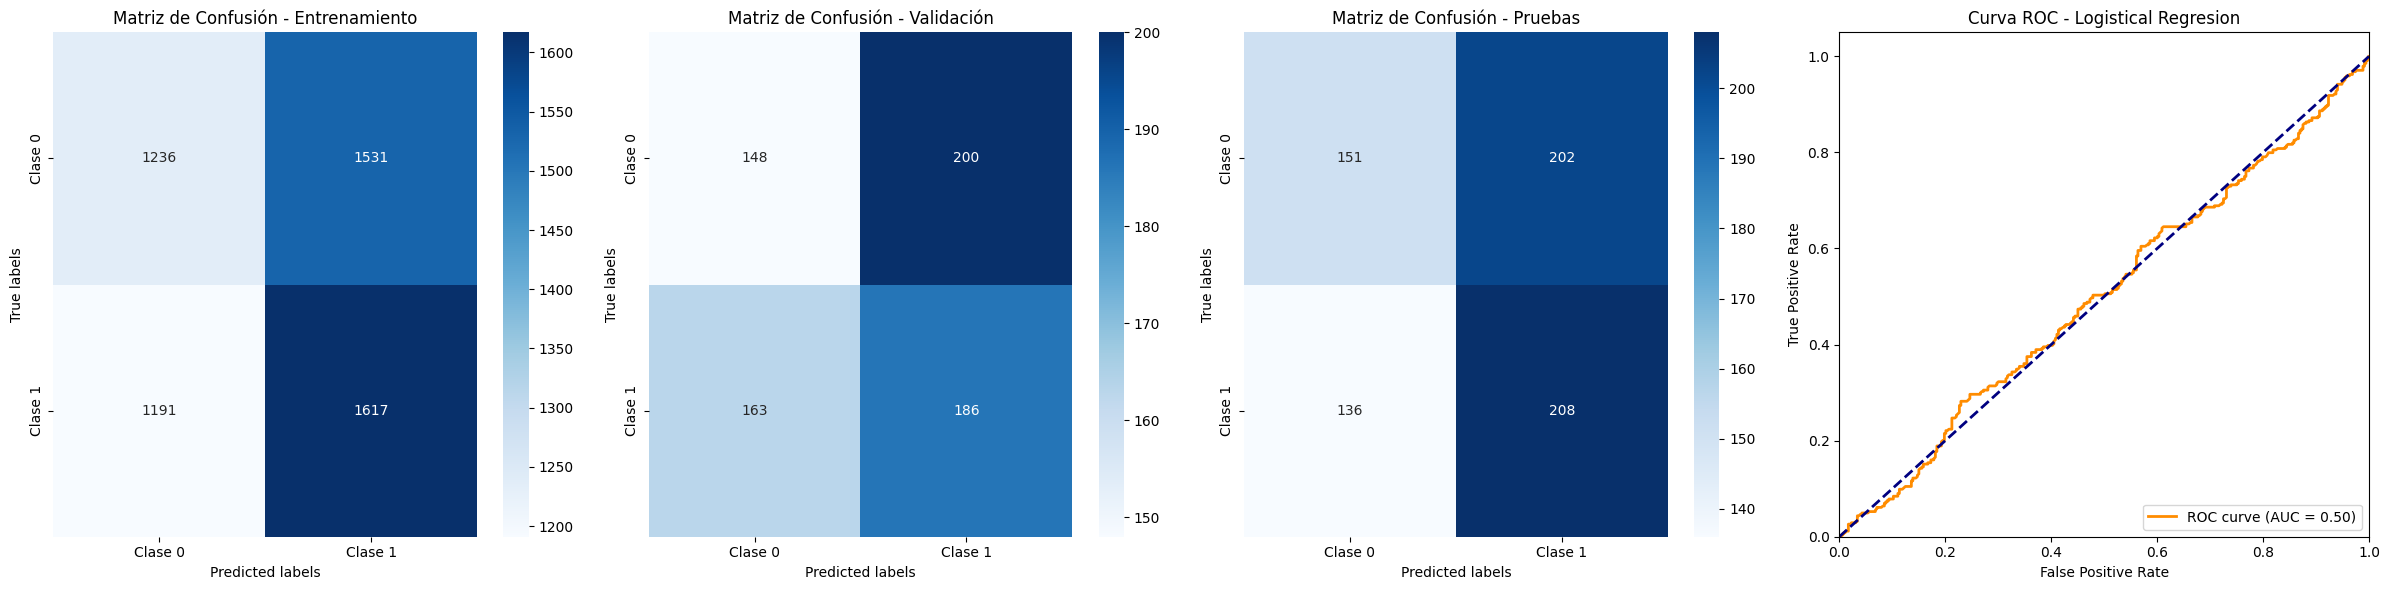

In [58]:
#EVALUACION DEL MODELO DE ML LOGISTICAL REGRESION
def metrics_model_lg(x,y):
    predictions=ros_modelLR.predict(x)
    accuracy_metric=accuracy_score(y,predictions)
    precision_metric=precision_score(y,predictions)
    recall_metric=recall_score(y,predictions)
    f1_metric=f1_score(y,predictions)
    tn,fp,fn,tp=confusion_matrix(y,predictions).ravel()
    specificity_metric=tn/(tn+fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {'Accuracy': accuracy_metric, 'Precision': precision_metric, 'Recall': recall_metric, 'F1 score': f1_metric,'Specificity':specificity_metric},confusion_mat

train_results,lr_mc_train= metrics_model_lg(lr_dataTrain, lr_targetTrain)
val_results,lr_mc_val = metrics_model_lg(lr_dataVal, lr_targetVal)
test_results,lr_mc_test = metrics_model_lg(lr_dataPrueba, lr_targetPrueba)
print(f'**METRICAS DE ENTRENAMIENTO LR:\n{train_results}')
print(f'**METRICAS DE VALIDACION LR:\n{val_results}')
print(f'**METRICAS DE PRUEBAS LR:\n{test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ros_lg(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ros_lg(axs[0], lr_mc_train, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ros_lg(axs[1], lr_mc_val, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ros_lg(axs[2], lr_mc_test, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
lr_probs = ros_modelLR.predict_proba(lr_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(lr_targetPrueba, lr_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Logistical Regresion')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


##### RANDOM FOREST

In [63]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
rf_dataTrain,rf_dataTemp,rf_targetTrain,rf_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
rf_dataVal, rf_dataPrueba,rf_targetVal, rf_targetPrueba = train_test_split(rf_dataTemp,rf_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO RF
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelRF=RandomForestClassifier(random_state=42,criterion='gini',max_features='sqrt',n_estimators=100)
modelRF.fit(rf_dataTrain,rf_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")


TIEMPO DE ENTRENAMIENTO DEL MODELO: 1.0967755317687988


**METRICAS DE ENTRENAMIENTO RF:
{'Accuracy': 0.7484624846248462, 'Precision': 0.7503064977523498, 'Recall': 0.7487765089722676, 'F1 score': 0.7495407225964482, 'Specificity': np.float64(0.7481450948062655)}
**METRICAS DE VALIDACION RF:
{'Accuracy': 0.5052631578947369, 'Precision': 0.4876660341555977, 'Recall': 0.5099206349206349, 'F1 score': 0.498545101842871, 'Specificity': np.float64(0.5009242144177449)}
**METRICAS DE PRUEBAS RF:
{'Accuracy': 0.511472275334608, 'Precision': 0.5314814814814814, 'Recall': 0.5266055045871559, 'F1 score': 0.5290322580645161, 'Specificity': np.float64(0.49500998003992014)}
VALIDACION CRUZADA ESTIMACION: [0.48463115 0.50717213 0.48565574 0.48410256 0.49538462]
MEDIA VALIDACION CRUZADA ESTIMACION: 0.4913892391761244


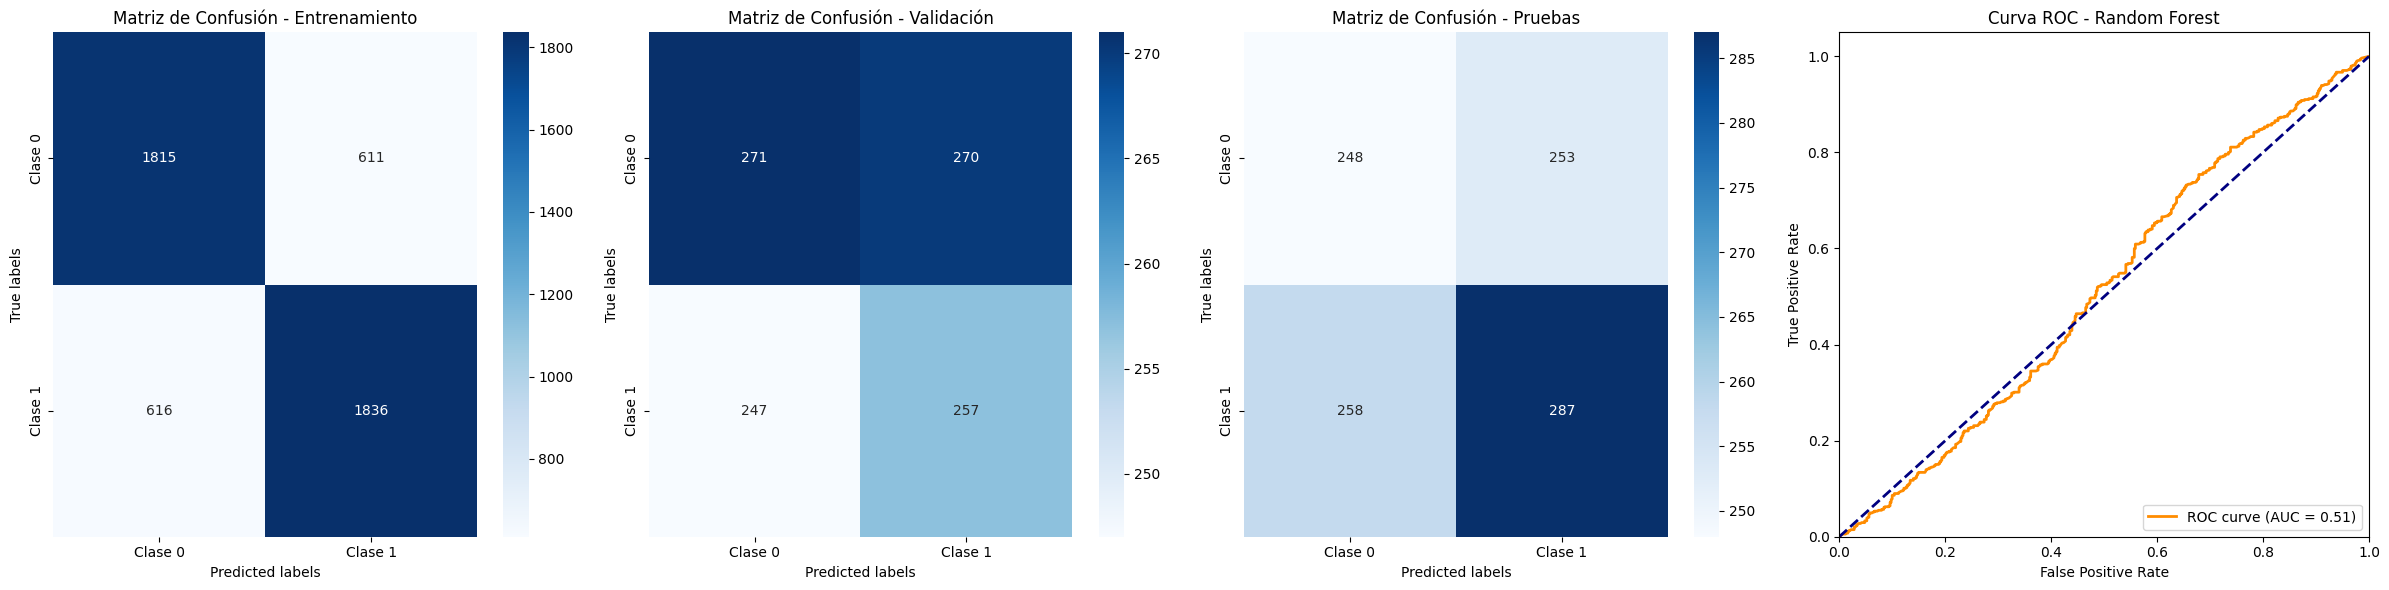

In [64]:

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_nm(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# EVALUACIÓN DEL MODELO DE ML RANDOM FOREST
def metrics_model_rf(x, y):
    predictions = modelRF.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
rf_train_results, train_mat_conf_rf = metrics_model_rf(rf_dataTrain, rf_targetTrain)
rf_val_results, val_mat_conf_rf = metrics_model_rf(rf_dataVal, rf_targetVal)
rf_test_results, test_mat_conf_rf = metrics_model_rf(rf_dataPrueba, rf_targetPrueba)

print(f'**METRICAS DE ENTRENAMIENTO RF:\n{rf_train_results}')
print(f'**METRICAS DE VALIDACION RF:\n{rf_val_results}')
print(f'**METRICAS DE PRUEBAS RF:\n{rf_test_results}')
print("===================================================================")
# Mostrar los resultados de la validación cruzada
print(f"VALIDACION CRUZADA ESTIMACION: {cross_val_score(modelRF, rf_dataTrain, rf_targetTrain, cv=5)}")
print(f"MEDIA VALIDACION CRUZADA ESTIMACION: {cross_val_score(modelRF, rf_dataTrain, rf_targetTrain, cv=5).mean()}")
# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura con subgráficos en una fila
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Graficar las matrices de confusión en cada subgráfico
plot_confusion_matrix_nm(axs[0], train_mat_conf_rf, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_nm(axs[1], val_mat_conf_rf, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_nm(axs[2], test_mat_conf_rf, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
rf_probs = modelRF.predict_proba(rf_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(rf_targetPrueba, rf_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC en el cuarto subgráfico
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Random Forest')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()



##### DECISION TREE 

In [42]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
dt_dataTrain,dt_dataTemp,dt_targetTrain,dt_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
dt_dataVal, dt_dataPrueba,dt_targetVal, dt_targetPrueba = train_test_split(dt_dataTemp,dt_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO DT
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelDT=DecisionTreeClassifier(criterion='gini',max_features='sqrt',max_leaf_nodes=None,min_samples_leaf=10 )
modelDT.fit(dt_dataTrain,dt_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")


TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.0069124698638916016


**METRICAS DE ENTRENAMIENTO DT:
{'Accuracy': 0.6410414104141041, 'Precision': 0.6465913843580092, 'Recall': 0.6305057096247961, 'F1 score': 0.6384472434441462, 'Specificity': np.float64(0.6516900247320693)}
**METRICAS DE VALIDACION DT:
{'Accuracy': 0.507177033492823, 'Precision': 0.4894433781190019, 'Recall': 0.5059523809523809, 'F1 score': 0.4975609756097561, 'Specificity': np.float64(0.5083179297597042)}
**METRICAS DE PRUEBAS DT:
{'Accuracy': 0.5066921606118547, 'Precision': 0.5268022181146026, 'Recall': 0.5229357798165137, 'F1 score': 0.5248618784530387, 'Specificity': np.float64(0.48902195608782434)}


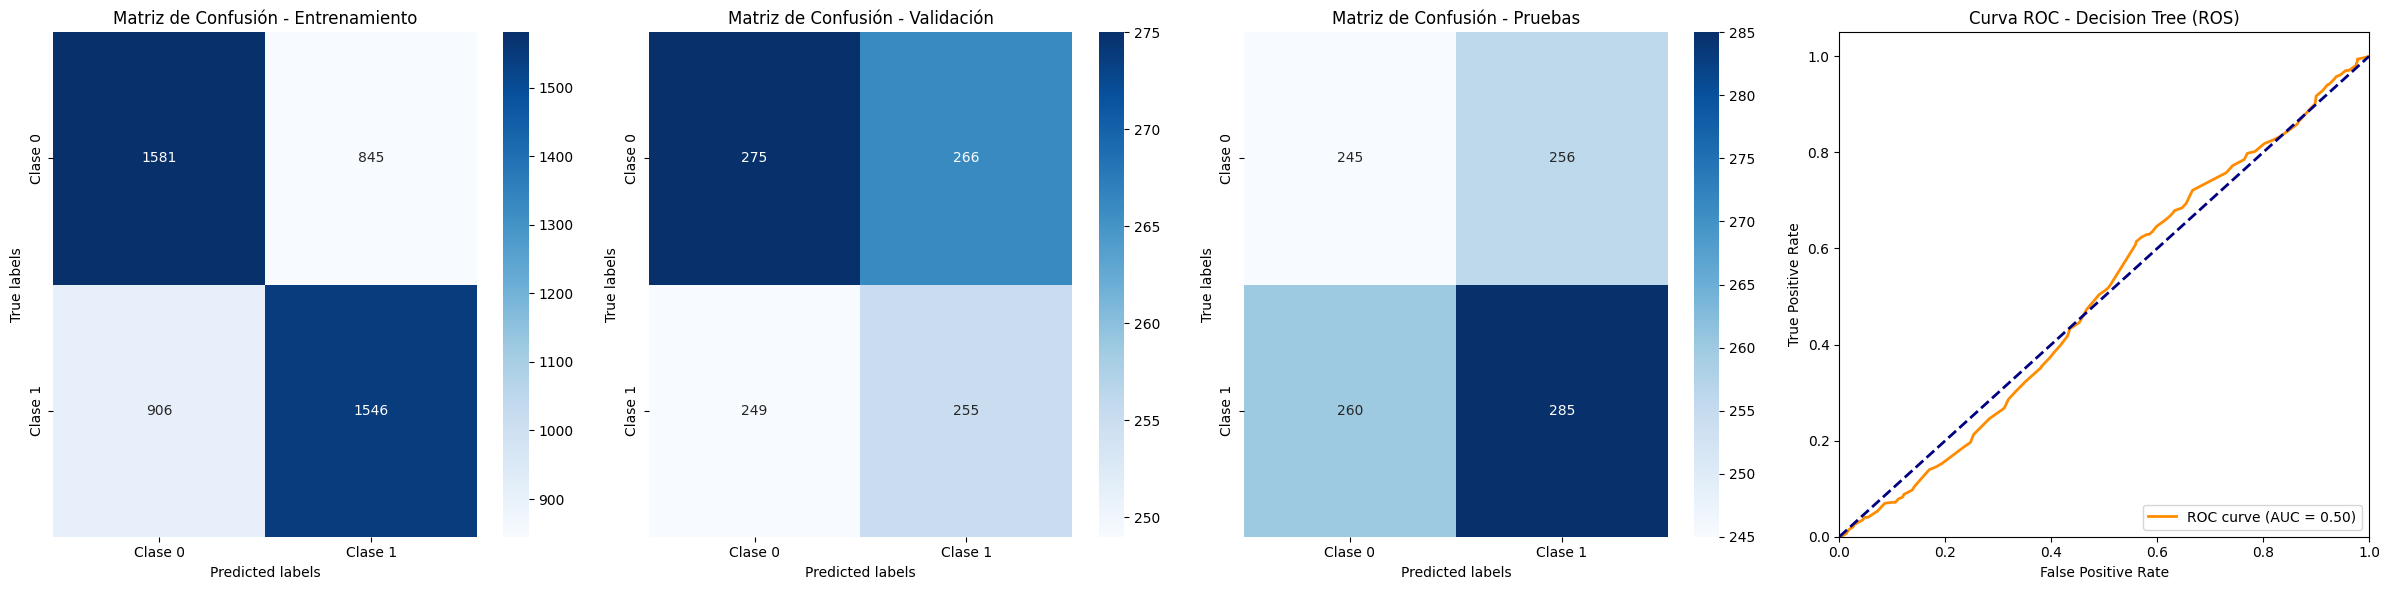

In [43]:

# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_dt(x, y):
    predictions = modelDT.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
dt_train_results, train_mat_conf_dt = metrics_model_dt(dt_dataTrain, dt_targetTrain)
dt_val_results, val_mat_conf_dt = metrics_model_dt(dt_dataVal, dt_targetVal)
dt_test_results, test_mat_conf_dt = metrics_model_dt(dt_dataPrueba, dt_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO DT:\n{dt_train_results}')
print(f'**METRICAS DE VALIDACION DT:\n{dt_val_results}')
print(f'**METRICAS DE PRUEBAS DT:\n{dt_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_dt(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_dt(axs[0], train_mat_conf_dt, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_dt(axs[1], val_mat_conf_dt, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_dt(axs[2], test_mat_conf_dt, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
dt_ros_probs = modelDT.predict_proba(dt_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(dt_targetPrueba, dt_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - Decision Tree (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


#### K-NEAREST NEIGHBORS (KNN)

In [44]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
knn_dataTrain,knn_dataTemp,knn_targetTrain,knn_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
knn_dataVal, knn_dataPrueba,knn_targetVal, knn_targetPrueba = train_test_split(knn_dataTemp,knn_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO KNN
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelKNN=KNeighborsClassifier(leaf_size=20,weights='uniform',n_neighbors=5,p=2)
modelKNN.fit(knn_dataTrain,knn_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")


TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.01779651641845703


**METRICAS DE ENTRENAMIENTO KNN:
{'Accuracy': 0.6758917589175891, 'Precision': 0.6756756756756757, 'Recall': 0.683115823817292, 'F1 score': 0.6793753802474143, 'Specificity': np.float64(0.6685902720527618)}
**METRICAS DE VALIDACION KNN:
{'Accuracy': 0.48899521531100476, 'Precision': 0.47126436781609193, 'Recall': 0.4880952380952381, 'F1 score': 0.47953216374269003, 'Specificity': np.float64(0.4898336414048059)}
**METRICAS DE PRUEBAS KNN:
{'Accuracy': 0.5019120458891013, 'Precision': 0.521505376344086, 'Recall': 0.5339449541284403, 'F1 score': 0.527651858567543, 'Specificity': np.float64(0.46706586826347307)}


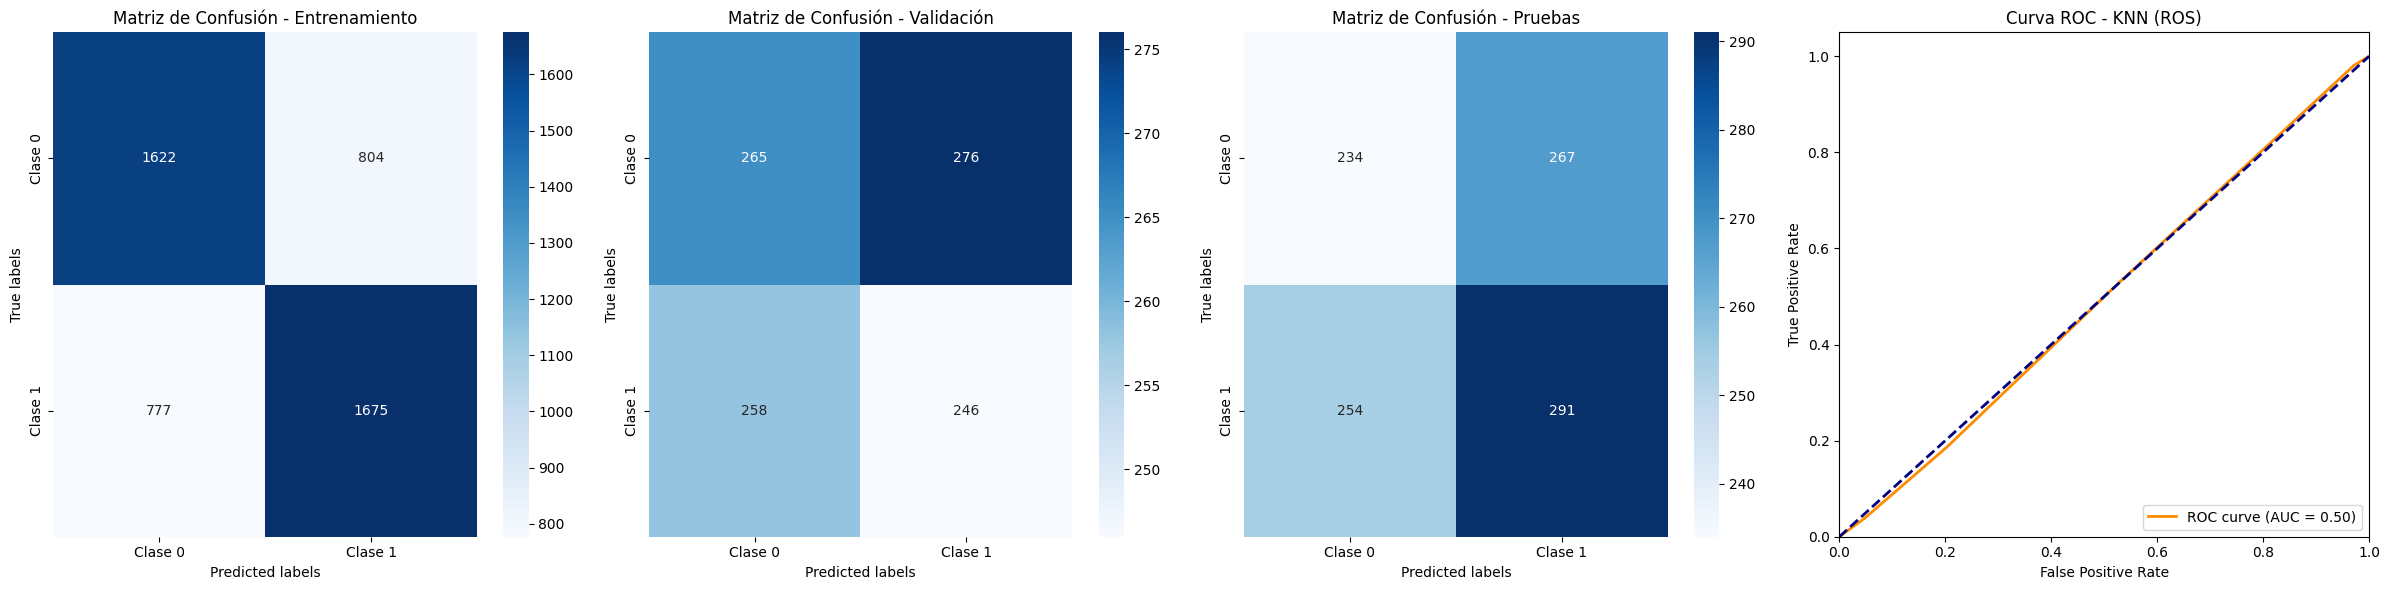

In [45]:

# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_knn(x, y):
    predictions = modelKNN.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
knn_train_results, train_mat_conf_knn = metrics_model_knn(knn_dataTrain, knn_targetTrain)
knn_val_results, val_mat_conf_knn = metrics_model_knn(knn_dataVal, knn_targetVal)
knn_test_results, test_mat_conf_knn = metrics_model_knn(knn_dataPrueba, knn_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO KNN:\n{knn_train_results}')
print(f'**METRICAS DE VALIDACION KNN:\n{knn_val_results}')
print(f'**METRICAS DE PRUEBAS KNN:\n{knn_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_knn(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_knn(axs[0], train_mat_conf_knn, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_knn(axs[1], val_mat_conf_knn, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_knn(axs[2], test_mat_conf_knn, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
knn_ros_probs = modelKNN.predict_proba(knn_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(knn_targetPrueba, knn_ros_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - KNN (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


#### XGBOOST

In [46]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
xg_dataTrain,xg_dataTemp,xg_targetTrain,xg_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
xg_dataVal, xg_dataPrueba,xg_targetVal, xg_targetPrueba = train_test_split(xg_dataTemp,xg_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO XGBOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelXGB=XGBClassifier(n_estimators=500,max_depth=7,learning_rate=0.1,subsample=0.7,colsample_bytree=0.7,random_state=42)
modelXGB.fit(xg_dataTrain,xg_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")



TIEMPO DE ENTRENAMIENTO DEL MODELO: 1.7245075702667236


**METRICAS DE ENTRENAMIENTO XGBOOST (ROS):
{'Accuracy': 0.6789667896678967, 'Precision': 0.6803745928338762, 'Recall': 0.6814845024469821, 'F1 score': 0.6809290953545232, 'Specificity': np.float64(0.6764220939818631)}
**METRICAS DE VALIDACION XGBOOST (ROS):
{'Accuracy': 0.48325358851674644, 'Precision': 0.4649805447470817, 'Recall': 0.4742063492063492, 'F1 score': 0.46954813359528486, 'Specificity': np.float64(0.49168207024029575)}
**METRICAS DE PRUEBAS XGBOOST (ROS):
{'Accuracy': 0.5019120458891013, 'Precision': 0.5218181818181818, 'Recall': 0.5266055045871559, 'F1 score': 0.5242009132420091, 'Specificity': np.float64(0.4750499001996008)}


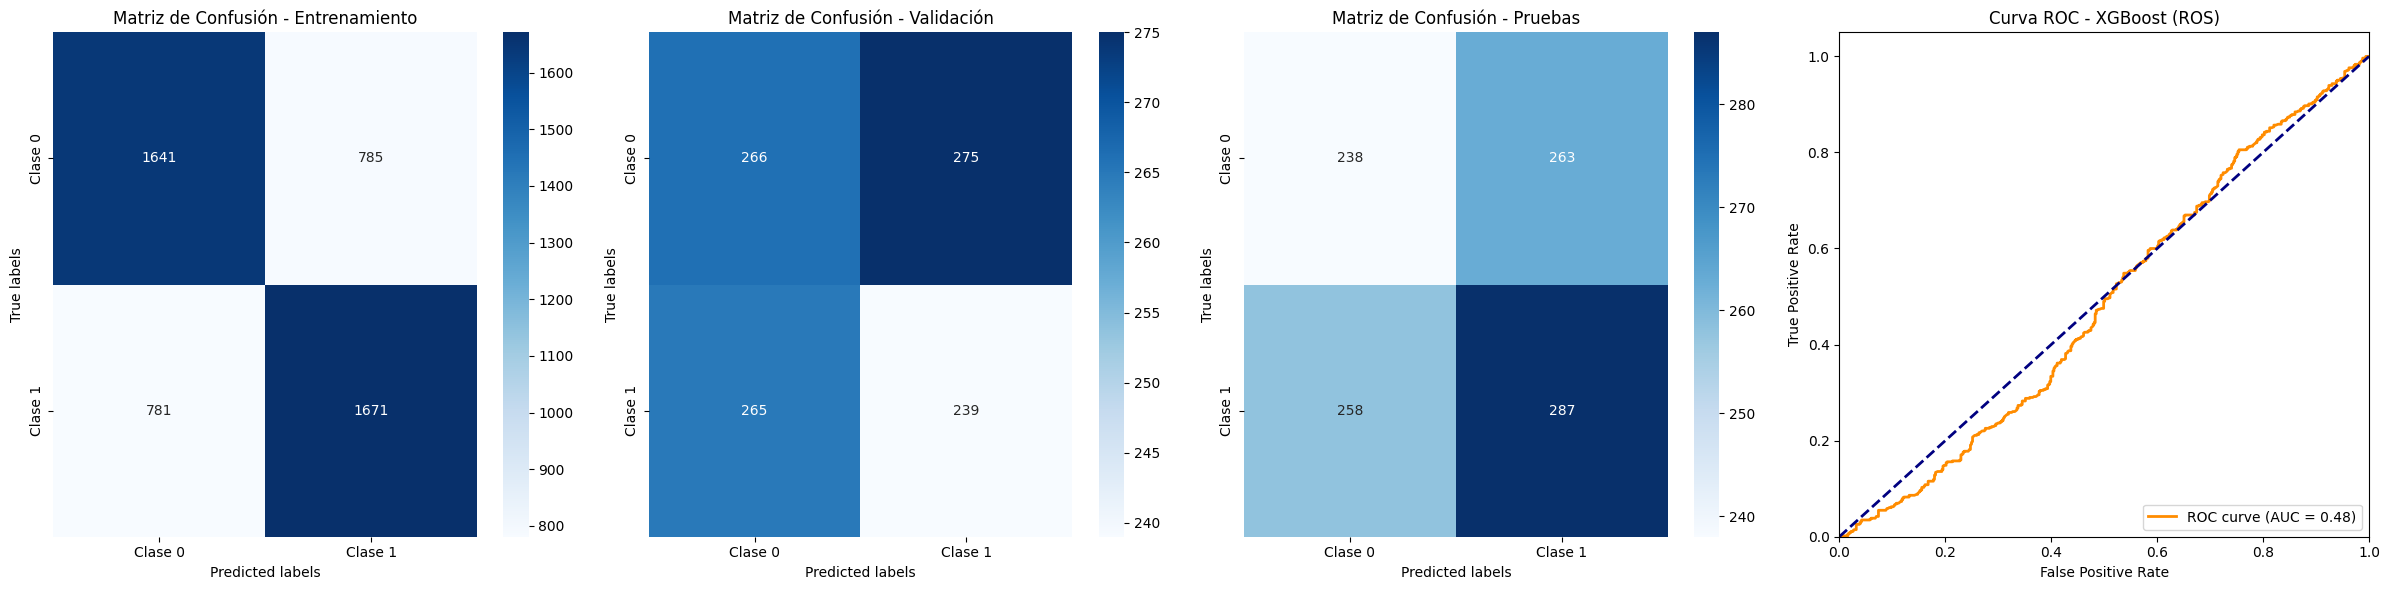

In [47]:

# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_xg(x, y):
    predictions = modelXGB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
xg_train_results, train_mat_conf_xg = metrics_model_xg(xg_dataTrain, xg_targetTrain)
xg_val_results, val_mat_conf_xg = metrics_model_xg(xg_dataVal, xg_targetVal)
xg_test_results, test_mat_conf_xg = metrics_model_xg(xg_dataPrueba, xg_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO XGBOOST (ROS):\n{xg_train_results}')
print(f'**METRICAS DE VALIDACION XGBOOST (ROS):\n{xg_val_results}')
print(f'**METRICAS DE PRUEBAS XGBOOST (ROS):\n{xg_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_xg(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_xg(axs[0], train_mat_conf_xg, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_xg(axs[1], val_mat_conf_xg, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_xg(axs[2], test_mat_conf_xg, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
xg_probs = modelXGB.predict_proba(xg_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(xg_targetPrueba, xg_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - XGBoost (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


#### NAIVE BAYES

In [48]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
nb_dataTrain,nb_dataTemp,nb_targetTrain,nb_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
nb_dataVal, nb_dataPrueba,nb_targetVal, nb_targetPrueba = train_test_split(nb_dataTemp,nb_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO NB
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelNB=GaussianNB()
modelNB.fit(nb_dataTrain,nb_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")


TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.0045413970947265625


**METRICAS DE ENTRENAMIENTO NB (ROS):
{'Accuracy': 0.5205002050020501, 'Precision': 0.5214747244393767, 'Recall': 0.5595432300163132, 'F1 score': 0.5398386779460949, 'Specificity': np.float64(0.48103874690849135)}
**METRICAS DE VALIDACION NB (ROS):
{'Accuracy': 0.5043062200956938, 'Precision': 0.4876325088339223, 'Recall': 0.5476190476190477, 'F1 score': 0.5158878504672897, 'Specificity': np.float64(0.46395563770794823)}
**METRICAS DE PRUEBAS NB (ROS):
{'Accuracy': 0.494263862332696, 'Precision': 0.5133779264214047, 'Recall': 0.563302752293578, 'F1 score': 0.537182852143482, 'Specificity': np.float64(0.41916167664670656)}


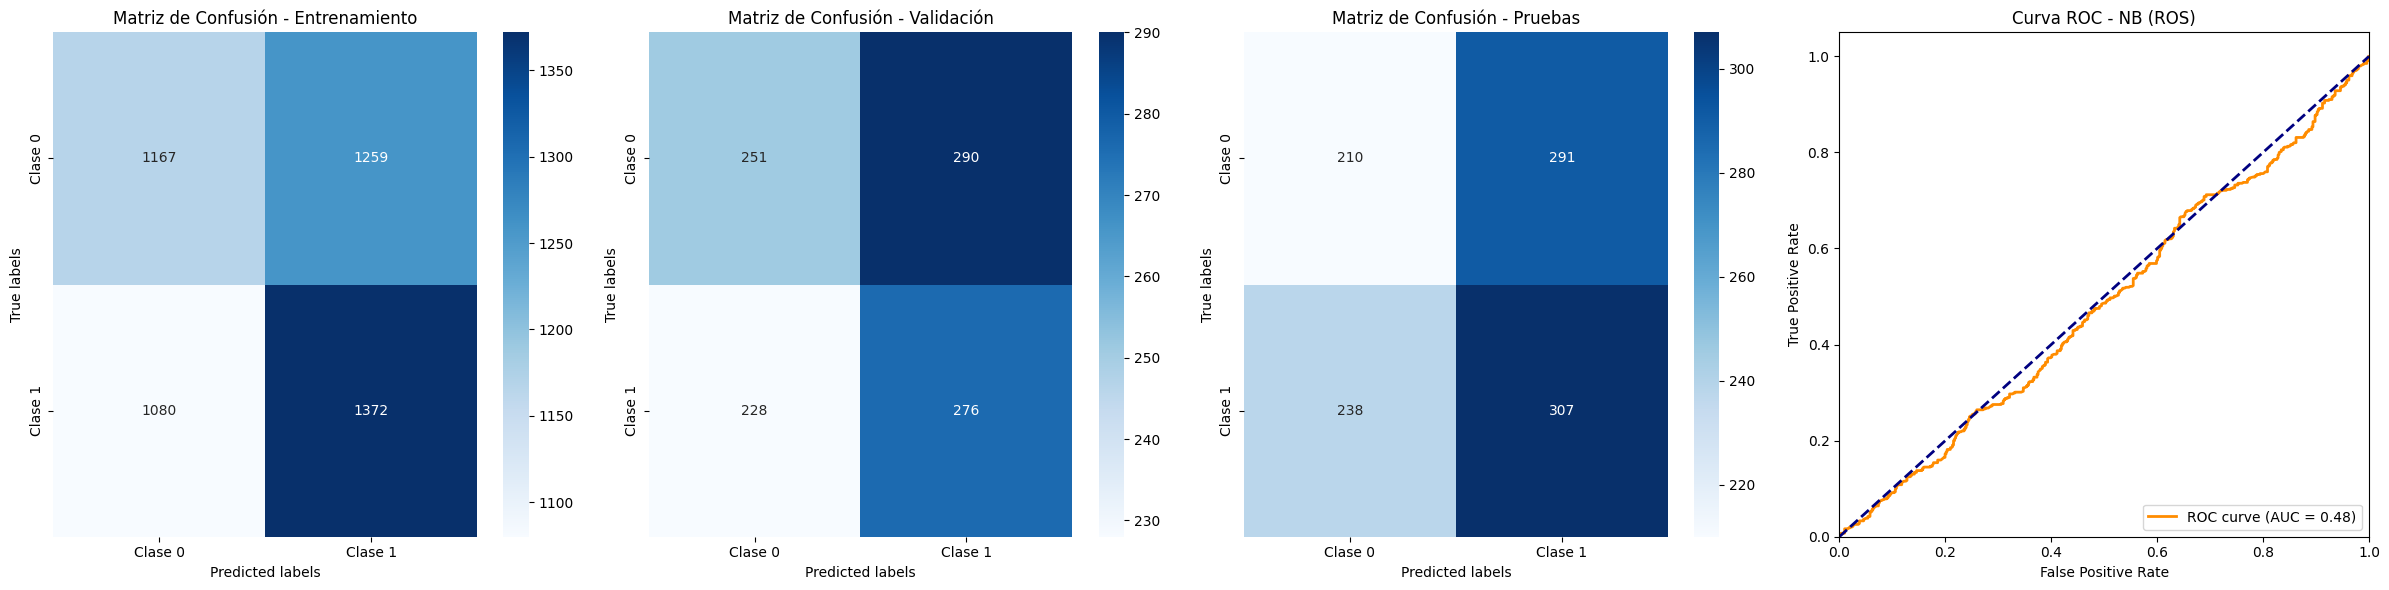

In [49]:

# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_nb(x, y):
    predictions = modelNB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
nb_train_results, train_mat_conf_nb = metrics_model_nb(nb_dataTrain, nb_targetTrain)
nb_val_results, val_mat_conf_nb = metrics_model_nb(nb_dataVal, nb_targetVal)
nb_test_results, test_mat_conf_nb = metrics_model_nb(nb_dataPrueba, nb_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO NB (ROS):\n{nb_train_results}')
print(f'**METRICAS DE VALIDACION NB (ROS):\n{nb_val_results}')
print(f'**METRICAS DE PRUEBAS NB (ROS):\n{nb_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_nb(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_nb(axs[0], train_mat_conf_nb, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_nb(axs[1], val_mat_conf_nb, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_nb(axs[2], test_mat_conf_nb, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
nb_probs = modelNB.predict_proba(nb_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(nb_targetPrueba, nb_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - NB (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


#### ADABOOST

In [50]:
#1. REALIZAMOS LA DISTRIBUCION DE NUESTROS DATOS BALANCEADOS EN DATOS DE ENTRENAMIENTO, VALIDACION y PRUEBA
ab_dataTrain,ab_dataTemp,ab_targetTrain,ab_targetTemp=train_test_split(x_risk_factors,y_target_glaucoma,test_size=0.3,random_state=42)
ab_dataVal, ab_dataPrueba,ab_targetVal, ab_targetPrueba = train_test_split(ab_dataTemp,ab_targetTemp, test_size=0.50, random_state=42)
#2. ENTRENAMIENTO DEL MODELO ADABOOST
#A) INICIALIZACION DEL MODELO
start_train_time=time.time()
modelAB=AdaBoostClassifier(algorithm='SAMME')
modelAB.fit(ab_dataTrain,ab_targetTrain)
end_train_time=time.time()
time_training_model=(end_train_time-start_train_time)
print(f"TIEMPO DE ENTRENAMIENTO DEL MODELO: {time_training_model}")



TIEMPO DE ENTRENAMIENTO DEL MODELO: 0.1972949504852295


d:\pruebita\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


**METRICAS DE ENTRENAMIENTO ADABOOST (ROS):
{'Accuracy': 0.527470274702747, 'Precision': 0.5267175572519084, 'Recall': 0.5909461663947798, 'F1 score': 0.5569863540265232, 'Specificity': np.float64(0.46331409727947237)}
**METRICAS DE VALIDACION ADABOOST (ROS):
{'Accuracy': 0.47942583732057414, 'Precision': 0.4665551839464883, 'Recall': 0.5535714285714286, 'F1 score': 0.5063520871143375, 'Specificity': np.float64(0.41035120147874304)}
**METRICAS DE PRUEBAS ADABOOST (ROS):
{'Accuracy': 0.47992351816443596, 'Precision': 0.5008183306055647, 'Recall': 0.5614678899082569, 'F1 score': 0.5294117647058824, 'Specificity': np.float64(0.3912175648702595)}


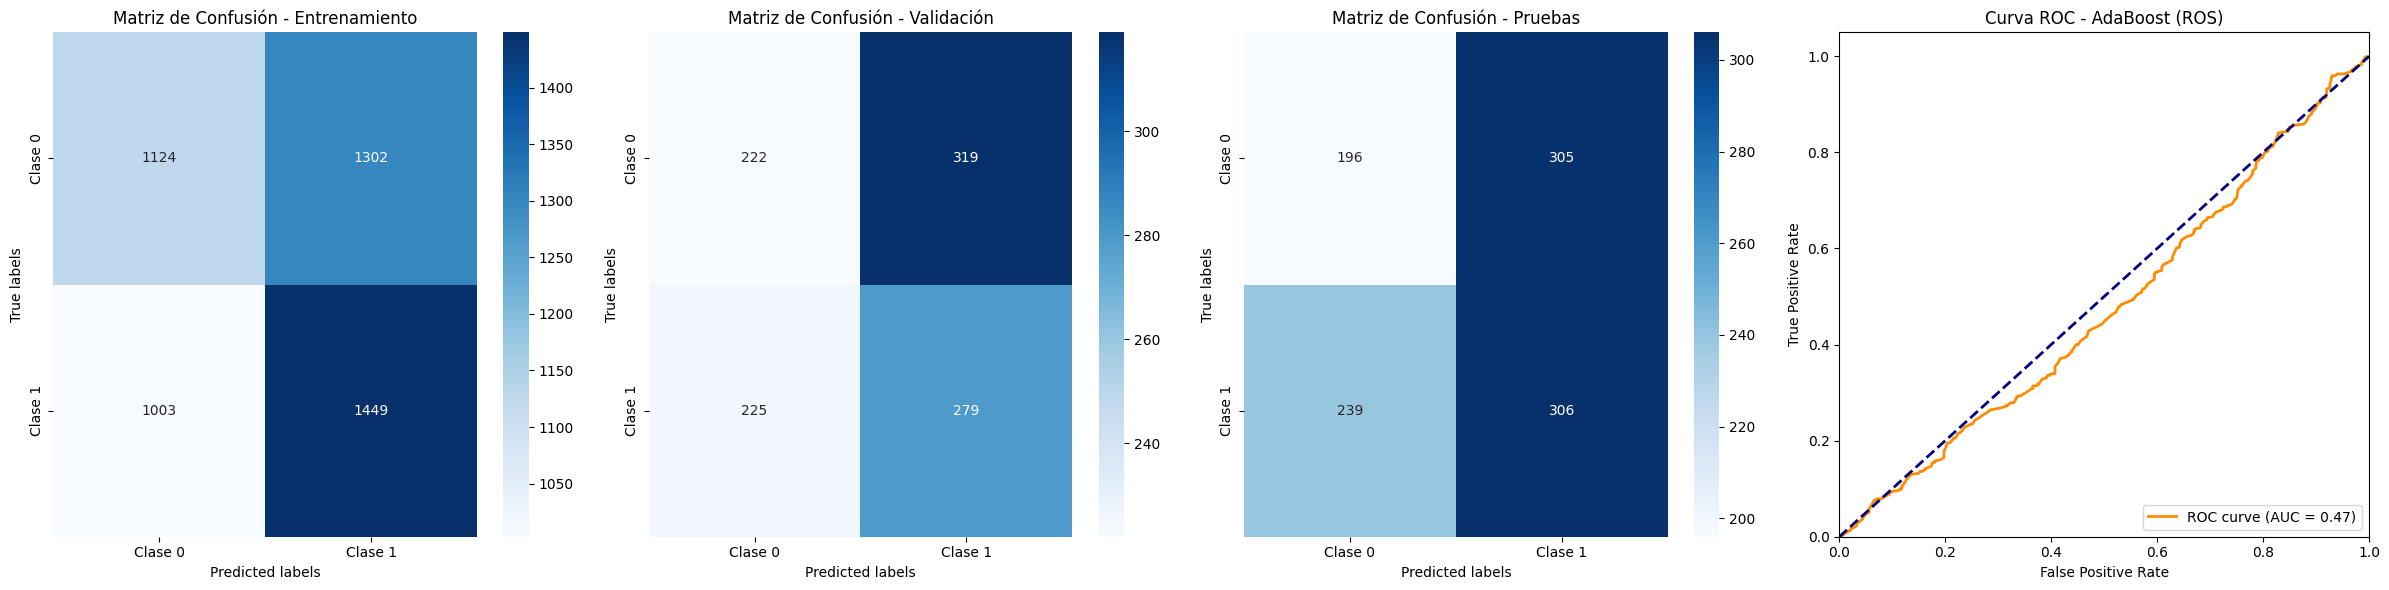

In [51]:

# Función para calcular las métricas y obtener la matriz de confusión
def metrics_model_ab(x, y):
    predictions = modelAB.predict(x)
    accuracy_metric = accuracy_score(y, predictions)
    precision_metric = precision_score(y, predictions)
    recall_metric = recall_score(y, predictions)
    f1_metric = f1_score(y, predictions)
    tn, fp, fn, tp = confusion_matrix(y, predictions).ravel()
    specificity_metric = tn / (tn + fp)
    confusion_mat = confusion_matrix(y, predictions)
    return {
        'Accuracy': accuracy_metric, 
        'Precision': precision_metric, 
        'Recall': recall_metric, 
        'F1 score': f1_metric, 
        'Specificity': specificity_metric
    }, confusion_mat

# Calcular las métricas y matrices de confusión para entrenamiento, validación y pruebas
ab_train_results, train_mat_conf_ab_ros = metrics_model_ab(ab_dataTrain, ab_targetTrain)
ab_val_results, val_mat_conf_ab_ros = metrics_model_ab(ab_dataVal, ab_targetVal)
ab_test_results, test_mat_conf_ab_ros = metrics_model_ab(ab_dataPrueba, ab_targetPrueba)

# Imprimir los resultados
print(f'**METRICAS DE ENTRENAMIENTO ADABOOST (ROS):\n{ab_train_results}')
print(f'**METRICAS DE VALIDACION ADABOOST (ROS):\n{ab_val_results}')
print(f'**METRICAS DE PRUEBAS ADABOOST (ROS):\n{ab_test_results}')

# Etiquetas para las clases (ajusta esto según tu caso)
labels = ['Clase 0', 'Clase 1']

# Crear una figura para las matrices de confusión y el AUC
fig, axs = plt.subplots(1, 4, figsize=(24, 6))

# Función para dibujar un mapa de calor de la matriz de confusión
def plot_confusion_matrix_ab_ros(ax, cm, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)

# Graficar las matrices de confusión
plot_confusion_matrix_ab_ros(axs[0], train_mat_conf_ab_ros, labels, title='Matriz de Confusión - Entrenamiento')
plot_confusion_matrix_ab_ros(axs[1], val_mat_conf_ab_ros, labels, title='Matriz de Confusión - Validación')
plot_confusion_matrix_ab_ros(axs[2], test_mat_conf_ab_ros, labels, title='Matriz de Confusión - Pruebas')

# Cálculo y gráfica del AUC para el conjunto de pruebas
ab_probs = modelAB.predict_proba(ab_dataPrueba)[:, 1]
fpr, tpr, thresholds = roc_curve(ab_targetPrueba, ab_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
axs[3].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[3].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axs[3].set_xlim([0.0, 1.0])
axs[3].set_ylim([0.0, 1.05])
axs[3].set_xlabel('False Positive Rate')
axs[3].set_ylabel('True Positive Rate')
axs[3].set_title('Curva ROC - AdaBoost (ROS)')
axs[3].legend(loc="lower right")

# Ajustar el espacio entre los subgráficos
plt.tight_layout()
plt.show()


GUARDAR EL MODELO PREDICTIVO EN .PKL 

In [54]:
import pickle

pickle.dump(modelRF, open('glaucoma_model.pkl', 'wb'))
print('modelo exportado correctamente')

modelo exportado correctamente
